# **성능관리_종합실습**

## **(1) 환경준비**

### **1) 라이브러리 불러오기**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, Input,Flatten
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping

from keras.datasets import fashion_mnist

### **2) 함수만들기**

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### **3) 데이터 로딩**

In [13]:
(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()

rd.seed(20)
tr_id = rd.sample(range(60000), 4000)
va_id = rd.sample(range(10000), 1000)

x_train, y_train = x_train[tr_id], y_train[tr_id]
x_val, y_val = x_val[va_id], y_val[va_id]

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### **4) 데이터 둘러보기**

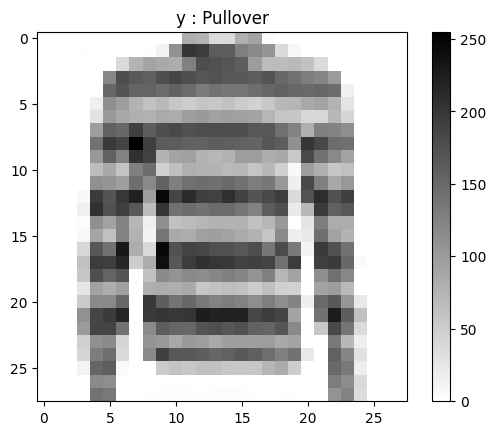

In [22]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 90
i = y_val[n]

plt.imshow(x_val[n], cmap=plt.cm.binary)
plt.title(f'y : {class_names[i]}')
plt.colorbar()
plt.show()

## **(2) 데이터준비**

### 1) 데이터 2차원으로 펼치기

In [6]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((4000, 28, 28), (4000,), (1000, 28, 28), (1000,))

In [7]:
# 펼치기
x_train = x_train.reshape(4000, -1)
x_val = x_val.reshape(1000, -1)

In [8]:
x_train.shape, x_val.shape

((4000, 784), (1000, 784))

### 2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_val를 그냥 255로 나누면 됨

In [9]:
x_train = x_train / 255.
x_val = x_val / 255.

## (3) 모델링

* 히든레이어의 노드를 다음과 같이 구성합니다.
    * 128, 64, 32, 16, 10
* epoch : 50 ~
* learning_rate : 0.01 ~ 0.0001


### 1) 모델1 : 과적합 모델
* 위에서 제시한 구조대로 모델을 설계하고 학습합니다.

#### ① 모델설계

In [23]:
n=x_train.shape[1]
n

28

In [40]:
clear_session()

model=Sequential([Input(shape=(28,28)),
                  Flatten(),
                  Dense(128, activation='relu'),
                  Dense(64,activation='relu'),
                  Dense(32,activation='relu'),
                  Dense(16,activation='relu'),
                  Dense(10,activation='softmax')])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy')

#### ② 학습

In [42]:
result=model.fit(x_train,y_train,epochs=50,validation_split=0.2).history

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 11.0333 - val_loss: 2.2192
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2006 - val_loss: 2.1751
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1251 - val_loss: 2.1910
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1232 - val_loss: 2.2406
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1021 - val_loss: 2.1031
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0526 - val_loss: 2.0696
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.0517 - val_loss: 2.1196
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0558 - val_loss: 2.0546
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9886 - val_loss: 2.0654
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0718 - val_loss: 2.2059
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.0890 - val_loss: 2.0971
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

#### ③ 예측 및 검증평가

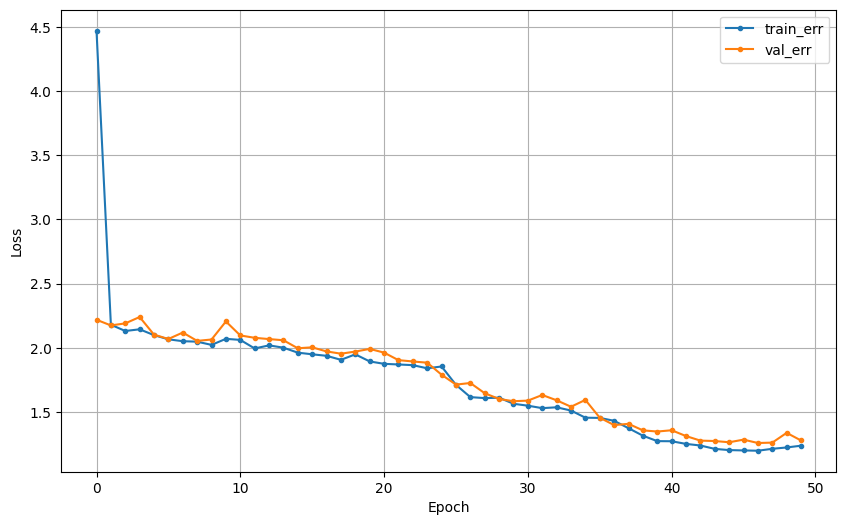

In [43]:
dl_history_plot(result)

In [46]:
pred = model.predict(x_val)
pred

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.9950310e-13,
        5.0948795e-35, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 8.6565277e-25,
        0.0000000e+00, 9.8970908e-01],
       [1.5523893e-01, 1.5925771e-01, 1.4112616e-01, ..., 8.0737919e-03,
        4.0100880e-02, 1.7050946e-02],
       ...,
       [1.5523893e-01, 1.5925771e-01, 1.4112616e-01, ..., 8.0737919e-03,
        4.0100880e-02, 1.7050946e-02],
       [1.5523893e-01, 1.5925771e-01, 1.4112616e-01, ..., 8.0737919e-03,
        4.0100880e-02, 1.7050946e-02],
       [3.9711958e-05, 5.2354038e-20, 2.3268453e-13, ..., 1.5654502e-03,
        9.9745262e-01, 7.2516646e-04]], dtype=float32)

In [50]:
pred = pred.argmax(axis=1)

In [52]:
accuracy = accuracy_score(y_val, pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.47


### 2) early stopping
* 모델1에 대해서, early stopping으로 과적합을 예방해 봅시다.

#### ① 모델설계

#### ② 학습

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2656 - val_loss: 1.2641
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1972 - val_loss: 1.2808
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2012 - val_loss: 1.2264
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1489 - val_loss: 1.2698
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1650 - val_loss: 1.2249
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1727 - val_loss: 1.2647
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1628 - val_loss: 1.3475
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1873 - val_loss: 1.3375
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1768 - val_loss: 1.4168
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2030 - val_loss: 1.2368


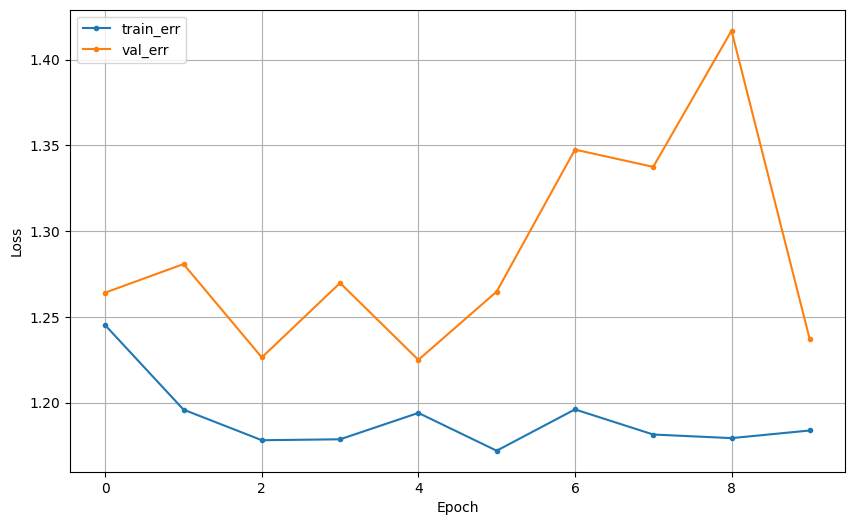

In [54]:

# EarlyStopping 설정 ------------------
min_de = 0.001
pat = 5

es = EarlyStopping(monitor = 'val_loss', min_delta = min_de, patience = pat)
# 학습
hist = model.fit(x_train, y_train, epochs = 100, validation_split=0.2,
                  callbacks = [es]).history
dl_history_plot(hist)

#### ③ 예측 및 검증평가

### 3) Dropout
* 모델1에 대해서, Dropout으로 과적합을 방지해 봅시다.

#### ① 모델설계

#### ② 학습

#### ③ 예측 및 검증평가